In [1]:
#pip install git+https://github.com/hiive/mlrose.git#egg=mlrose-hiive

In [2]:
#pip install git+https://github.com/knakamura13/mlrose-ky/#egg=mlrose-ky

In [3]:
import mlrose_hiive as mh

In [4]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [5]:
import pandas as pd

In [6]:
# problem size - iteration

In [7]:
# # Flilp Flop - size 14
problem_ffp_small = mh.FlipFlopGenerator().generate(seed=0, size=14)

In [8]:
# SA runner class
# 1. tune tempeature list
sa_ffp_small = mh.SARunner(problem=problem_ffp_small,
              experiment_name='ffp_sa_small',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              temperature_list=[1, 2.0, 5.0],
              decay_list=[mh.ExpDecay])

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = sa_ffp_small.run()

In [86]:
df_run_curves_ffp.shape

(1137, 6)

In [87]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000688,5.0,0.0,1,2048
1,1,0.009446,6.0,2.0,1,2048
2,2,0.014039,6.0,4.0,1,2048
3,3,0.019683,8.0,6.0,1,2048
4,4,0.019885,9.0,8.0,1,2048


In [88]:
df_run_curves_ffp['Temperature'].value_counts() # what does it say?

2.0    525
5.0    394
1      218
Name: Temperature, dtype: int64

In [89]:
df_run_curves_ffp.shape

(1137, 6)

In [90]:
# need to check Time and FEvals

In [91]:
df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
217,217,0.099807,13.0,272.0,1,2048
742,524,0.319573,13.0,723.0,2.0,2048
1136,393,0.171243,13.0,672.0,5.0,2048


In [92]:
df_run_curves_ffp.dtypes

Iteration        int64
Time           float64
Fitness        float64
FEvals         float64
Temperature     object
max_iters        int64
dtype: object

In [93]:
df_run_curves_ffp['Temperature'] = df_run_curves_ffp['Temperature'].astype(str).astype(float)

In [94]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [95]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
217,217,0.099807,13.0,272.0,1.0,2048
742,524,0.319573,13.0,723.0,2.0,2048
1136,393,0.171243,13.0,672.0,5.0,2048


In [96]:
df_curves_bestfitness_ffp.groupby('Temperature').agg({'FEvals': 'mean', 'Iteration': 'min', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals and less iteration. Pick temp=1

,Temperature,FEvals,Iteration,Time
0,1.0,272.0,217,0.099807
1,2.0,723.0,524,0.319573
2,5.0,672.0,393,0.171243


In [98]:
# SA runner class
# 2. tune decay, compare with the above results of the same temp
sa_geom_ffp_small = mh.SARunner(problem=problem_ffp_small,
              experiment_name='ffp_sa_small_genom',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              temperature_list=[1, 2, 5],
              decay_list=[mh.GeomDecay])

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = sa_geom_ffp_small.run()

In [99]:
df_run_curves_ffp.shape

(1868, 6)

In [100]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.001030,5.0,0.0,1,2048
1,1,0.008202,6.0,2.0,1,2048
2,2,0.012665,6.0,4.0,1,2048
3,3,0.018738,8.0,6.0,1,2048
4,4,0.018883,9.0,8.0,1,2048


In [101]:
df_run_curves_ffp['Temperature'].value_counts() # what does it say?

1    937
2    531
5    400
Name: Temperature, dtype: int64

In [102]:
# need to check Time and FEvals

In [103]:
df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
936,936,1.686406,13.0,1107.0,1,2048
1467,530,0.535929,13.0,691.0,2,2048
1867,399,0.328396,13.0,614.0,5,2048


In [104]:
df_run_curves_ffp.dtypes

Iteration        int64
Time           float64
Fitness        float64
FEvals         float64
Temperature     object
max_iters        int64
dtype: object

In [105]:
df_run_curves_ffp['Temperature'] = df_run_curves_ffp['Temperature'].astype(str).astype(float)

In [106]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [107]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
936,936,1.686406,13.0,1107.0,1.0,2048
1467,530,0.535929,13.0,691.0,2.0,2048
1867,399,0.328396,13.0,614.0,5.0,2048


In [108]:
df_curves_bestfitness_ffp.groupby('Temperature').agg({'FEvals': 'mean', 'Iteration': 'min', 'Time': 'min'}).reset_index()
# Temp = 5 => less Iterations and slightly more FEvals than temp = 2. Pick temp=5

,Temperature,FEvals,Iteration,Time
0,1.0,1107.0,936,1.686406
1,2.0,691.0,530,0.535929
2,5.0,614.0,399,0.328396


In [ ]:
# tentatively, pick exp decay with initial temp=1, as its FEvals, Iteration and Time are much less

In [109]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.001030,5.0,0.0,1.0,2048
1,1,0.008202,6.0,2.0,1.0,2048
2,2,0.012665,6.0,4.0,1.0,2048
3,3,0.018738,8.0,6.0,1.0,2048
4,4,0.018883,9.0,8.0,1.0,2048


In [13]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [14]:
# SA runner - size = 14
# 3. iterate through 10 seeds
for s in range(10):
    sa_ffp_small = mh.SARunner(problem=problem_ffp_small,
              experiment_name='ffp_sa_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              temperature_list=[1],
              decay_list=[mh.ExpDecay])

    df_run_stats_ffp, df_run_curves_ffp_sub = sa_ffp_small.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [15]:
df_iter_curves_ffp.shape

(4509, 6)

In [28]:
df_iter_curves_ffp.to_csv("../../csv-files/df_iter_curves_14_sa.csv")

In [16]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000281,5.0,0.0,1,2048
1,1,0.004316,6.0,2.0,1,2048
2,2,0.014224,6.0,4.0,1,2048
3,3,0.018160,8.0,6.0,1,2048
4,4,0.018284,9.0,8.0,1,2048


In [17]:
df_iter_curves_ffp.Iteration.max()

1208

In [18]:
df_iter_curves_ffp.Fitness.max()

13.0

In [19]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [20]:
df_fitness_iter_ffp.shape

(1209, 3)

In [21]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == df_iter_curves_ffp.Fitness.max() - 1].Iteration.min()

414

In [26]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

1208

In [22]:
for i in range(414, df_iter_curves_ffp.Iteration.max()+1):
    if df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration >= i].avg_fitness.min() >= df_iter_curves_ffp.Fitness.max() - 1:
        print(i)
        break

462


In [23]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [24]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,7.3,3.788889,1.946507
1,1,7.1,2.766667,1.663330
2,2,7.1,2.766667,1.663330
3,3,7.8,1.955556,1.398412
4,4,7.8,2.177778,1.475730


Text(0, 0.5, 'Fitness')

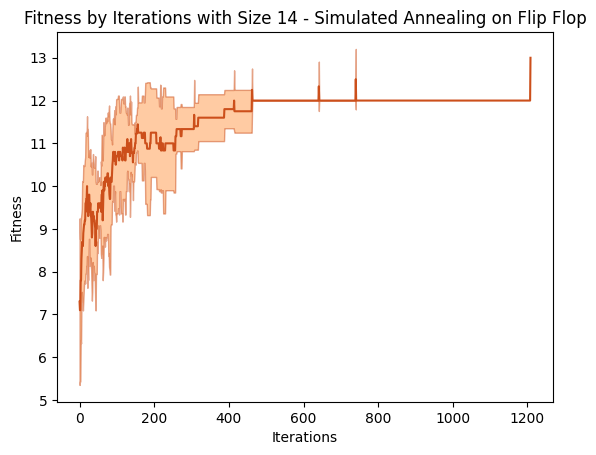

In [25]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#CC4F1B')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.title('Fitness by Iterations with Size 14 - Simulated Annealing on Flip Flop')
plt.xlabel('Iterations')
plt.ylabel('Fitness')